In [1]:
import pandas as pd

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 70)

playerFrames = pd.read_csv('../scrape-parse/demo/parse/2023/playerFrames/blast-premier-fall-groups-2023-big-vs-astralis-bo3-AJ6pTg2cD4u8jKjNk-bhJKbig-vs-astralis-m2-ancient.dem.csv')

pf = playerFrames[['tick', 'roundNum', 'seconds', 'side', 'name', 'x', 'y', 'z',
    'eyeX', 'eyeY', 'eyeZ', 'velocityX', 'velocityY', 'velocityZ',
    'hp', 'armor', 'activeWeapon',
    'flashGrenades', 'smokeGrenades', 'heGrenades', 'totalUtility',
    'isAlive', 'isReloading', 'isDefusing', 'isPlanting', 'isUnknown',
    'equipmentValue', 'equipmentValueRoundStart', 'hasHelmet',
    'hasDefuse', 'hasBomb'
    ]]

rounds = pd.read_csv('../scrape-parse/demo/parse/2023/rounds/blast-premier-fall-groups-2023-big-vs-astralis-bo3-AJ6pTg2cD4u8jKjNk-bhJKbig-vs-astralis-m2-ancient.dem.csv')
rounds = rounds[['roundNum', 'tScore', "ctScore" ,'endTScore', 'endCTScore']]

kills = pd.read_csv("../scrape-parse/demo/parse/2023/kills/blast-premier-fall-groups-2023-big-vs-astralis-bo3-AJ6pTg2cD4u8jKjNk-bhJKbig-vs-astralis-m2-ancient.dem.csv")

pf = pf.merge(rounds, on='roundNum')
pf["winsRounds"] = pf.apply(lambda x: 
    1 if ( (x['side'] == 'T') and (x['endTScore'] > x['tScore']) ) or ( (x['side'] == 'CT') and (x['endCTScore'] > x['ctScore']) )
    else 0, axis=1)

pf['kills'] = 0
pf['deaths'] = 0

for index, row in kills.iterrows():
    pf.loc[(pf['tick'] >= row['tick']) & (pf['name'] == row['attackerName']), 'kills'] += 1
    pf.loc[(pf['tick'] >= row['tick']) & (pf['name'] == row['victimName']), 'deaths'] += 1

pf.loc[pf['name'] == 'Buzz']

,tick,roundNum,seconds,side,name,x,y,z,eyeX,eyeY,eyeZ,velocityX,velocityY,velocityZ,hp,armor,activeWeapon,flashGrenades,smokeGrenades,heGrenades,totalUtility,isAlive,isReloading,isDefusing,isPlanting,isUnknown,equipmentValue,equipmentValueRoundStart,hasHelmet,hasDefuse,hasBomb,tScore,ctScore,endTScore,endCTScore,winsRounds,kills,deaths
8,8685,1,0.117188,T,Buzz,-437.512848,-2335.330078,-163.255753,-437.512848,-2335.330078,-99.193192,-86.079056,10.278288,0.000000,100,0,Knife,0,0,0,0,True,False,False,False,False,900,200,False,False,False,0,0,1,0,1,0,0
15,8701,1,0.242188,T,Buzz,-453.213165,-2333.562500,-163.255753,-453.213165,-2333.562500,-99.193192,-155.194717,16.633657,0.000000,100,0,Knife,0,0,0,0,True,False,False,False,False,900,200,False,False,False,0,0,1,0,1,0,0
28,8717,1,0.367188,T,Buzz,-475.634644,-2331.301270,-163.255753,-475.634644,-2331.301270,-99.193192,-197.463318,19.016655,0.000000,100,0,Knife,0,0,0,0,True,False,False,False,False,900,200,False,False,False,0,0,1,0,1,0,0
38,8733,1,0.492188,T,Buzz,-502.160858,-2328.826416,-163.255753,-502.160858,-2328.826416,-99.193192,-223.217072,20.579199,0.000000,100,0,Knife,0,0,0,0,True,False,False,False,False,900,200,False,False,False,0,0,1,0,1,0,0
48,8749,1,0.617188,T,Buzz,-531.155579,-2325.920410,-163.255753,-531.155579,-2325.920410,-99.193192,-238.204697,27.241087,0.000000,100,0,Knife,0,0,0,0,True,False,False,False,False,900,200,False,False,False,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222864,487868,26,21.664062,CT,Buzz,-678.487122,-125.157410,59.345699,-919.021606,1135.302734,135.303207,119.529289,-25.433609,0.000000,0,0,NaN,0,0,0,0,False,False,False,False,False,4950,200,False,False,False,15,10,16,10,0,20,18
222871,487884,26,21.789062,CT,Buzz,-678.487122,-125.157410,59.345699,-906.263245,1126.729248,134.399223,81.965324,-98.090469,0.000000,0,0,NaN,0,0,0,0,False,False,False,False,False,4950,200,False,False,False,15,10,16,10,0,20,18
222883,487900,26,21.914062,CT,Buzz,-678.487122,-125.157410,59.345699,-896.326233,1114.000610,162.071266,79.427788,-101.945000,211.368378,0,0,NaN,0,0,0,0,False,False,False,False,False,4950,200,False,False,False,15,10,16,10,0,20,18
222890,487916,26,22.039062,CT,Buzz,-678.487122,-125.157410,59.345699,-889.591431,1098.533569,182.242157,42.499104,-132.200958,111.368378,0,0,NaN,0,0,0,0,False,False,False,False,False,4950,200,False,False,False,15,10,16,10,0,20,18


<BarContainer object of 23 artists>

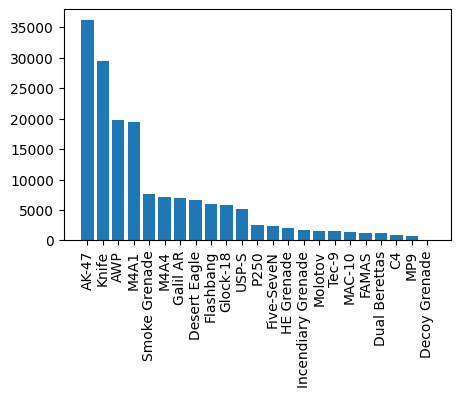

In [2]:
import matplotlib.pyplot as plt

asd = pd.DataFrame([pf.activeWeapon.value_counts().sort_values(ascending=False).index, pf.activeWeapon.value_counts().sort_values(ascending=False).values]).T
fig = plt.figure(figsize=(5, 3))
plt.xticks(rotation=90)
plt.bar(asd[0], asd[1])

In [3]:
dummies = pd.get_dummies(pf['activeWeapon'], prefix="activeWeapon",drop_first=False)[['activeWeapon_AK-47','activeWeapon_Knife','activeWeapon_AWP','activeWeapon_M4A1','activeWeapon_Smoke Grenade','activeWeapon_M4A4','activeWeapon_Galil AR','activeWeapon_Desert Eagle','activeWeapon_Flashbang','activeWeapon_Glock-18','activeWeapon_USP-S']]
dummies
pf = pf.merge(dummies, left_index = True, right_index = True, how = 'left')
pf.head(2)

,tick,roundNum,seconds,side,name,x,y,z,eyeX,eyeY,eyeZ,velocityX,velocityY,velocityZ,hp,armor,activeWeapon,flashGrenades,smokeGrenades,heGrenades,totalUtility,isAlive,isReloading,isDefusing,isPlanting,isUnknown,equipmentValue,equipmentValueRoundStart,hasHelmet,hasDefuse,hasBomb,tScore,ctScore,endTScore,endCTScore,winsRounds,kills,deaths,activeWeapon_AK-47,activeWeapon_Knife,activeWeapon_AWP,activeWeapon_M4A1,activeWeapon_Smoke Grenade,activeWeapon_M4A4,activeWeapon_Galil AR,activeWeapon_Desert Eagle,activeWeapon_Flashbang,activeWeapon_Glock-18,activeWeapon_USP-S
0,8685,1,0.117188,CT,s1n,-430.607147,1688.966064,27.320375,-430.607147,1688.966064,91.382936,21.685839,-108.023254,0.0,100,0,Flashbang,1,0,0,1,True,False,False,False,False,400,200,False,False,False,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,True,False,False
1,8685,1,0.117188,CT,tabseN,-222.246323,1737.048462,25.823181,-222.246323,1737.048462,89.885742,25.317469,-107.203705,0.0,100,100,Flashbang,1,1,0,2,True,False,False,False,False,1350,200,False,False,False,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,True,False,False


In [4]:
players = {}
players[0] = pf[pf['name'] == 's1n'].copy()
players[1] = pf[pf['name'] == 'tabseN'].copy()
players[2] = pf[pf['name'] == 'prosus'].copy()
players[3] = pf[pf['name'] == 'Krimbo'].copy()
players[4] = pf[pf['name'] == 'mantuu'].copy()

players[5] = pf[pf['name'] == 'blameF'].copy()
players[6] = pf[pf['name'] == 'Staehr'].copy()
players[7] = pf[pf['name'] == 'dev1ce'].copy()
players[8] = pf[pf['name'] == 'Buzz'].copy()
players[9] = pf[pf['name'] == 'b0RUP'].copy()

for idx, player in enumerate(players):
    
    players[idx].replace(True, 1, inplace=True)
    players[idx].replace(False, 0, inplace=True)
    players[idx]['player' + str(idx) + '_isCT'] = players[idx]['side'].apply(lambda x: 1 if x == 'CT' else 0)
    players[idx].rename(columns={
        'x': 'player' + str(idx) + '_x',
        'y': 'player' + str(idx) + '_y',
        'z': 'player' + str(idx) + '_z',
        'eyeX': 'player' + str(idx) + '_eyeX',
        'eyeY': 'player' + str(idx) + '_eyeY',
        'eyeZ': 'player' + str(idx) + '_eyeZ',
        'velocityX': 'player' + str(idx) + '_velocityX',
        'velocityY': 'player' + str(idx) + '_velocityY',
        'velocityZ': 'player' + str(idx) + '_velocityZ',
        'hp': 'player' + str(idx) + '_hp',
        'armor': 'player' + str(idx) + '_armor',
        'flashGrenades': 'player' + str(idx) + '_flashGrenades',
        'smokeGrenades': 'player' + str(idx) + '_smokeGrenades',
        'heGrenades': 'player' + str(idx) + '_heGrenades',
        'totalUtility': 'player' + str(idx) + '_totalUtility',
        'isAlive': 'player' + str(idx) + '_isAlive',
        'isReloading': 'player' + str(idx) + '_isReloading',
        'isDefusing': 'player' + str(idx) + '_isDefusing',
        'isPlanting': 'player' + str(idx) + '_isPlanting',
        'isUnknown': 'player' + str(idx) + '_isUnknown',
        'equipmentValue': 'player' + str(idx) + '_equipmentValue',
        'equipmentValueRoundStart': 'player' + str(idx) + '_equipmentValueRoundStart',
        'hasHelmet': 'player' + str(idx) + '_hasHelmet',
        'hasDefuse': 'player' + str(idx) + '_hasDefuse',
        'hasBomb': 'player' + str(idx) + '_hasBomb',
        'activeWeapon_AK-47': 'player' + str(idx) + '_activeWeapon_AK-47',
        'activeWeapon_Knife': 'player' + str(idx) + '_activeWeapon_Knife',
        'activeWeapon_AWP': 'player' + str(idx) + '_activeWeapon_AWP',
        'activeWeapon_M4A1': 'player' + str(idx) + '_activeWeapon_M4A1',
        'activeWeapon_Smoke Grenade': 'player' + str(idx) + '_activeWeapon_Smoke Grenade',
        'activeWeapon_M4A4': 'player' + str(idx) + '_activeWeapon_M4A4',
        'activeWeapon_Galil AR': 'player' + str(idx) + '_activeWeapon_Galil AR',
        'activeWeapon_Desert Eagle': 'player' + str(idx) + '_activeWeapon_Desert Eagle',
        'activeWeapon_Flashbang': 'player' + str(idx) + '_activeWeapon_Flashbang',
        'activeWeapon_Glock-18': 'player' + str(idx) + '_activeWeapon_Glock-18',
        'activeWeapon_USP-S': 'player' + str(idx) + '_activeWeapon_USP-S',
        'kills': 'player' + str(idx) + '_kills',
        'deaths': 'player' + str(idx) + '_deaths',
    }, inplace=True)

    del players[idx]['name']
    del players[idx]['side']
    del players[idx]['activeWeapon']
    del players[idx]['winsRounds']

In [5]:
df = players[0]
for idx in range(1, len(players)):
    df = df.merge(players[idx], on=['tick', 'roundNum', 'seconds', 'tScore', 'ctScore', 'endTScore', 'endCTScore',], how='left')
    
df['ct_wins'] = df[['ctScore', 'endCTScore']].apply(lambda x: 1 if x['endCTScore'] > x['ctScore'] else 0, axis=1)
df['team1_alive_num'] = df[['player0_isAlive', 'player1_isAlive', 'player2_isAlive', 'player3_isAlive', 'player4_isAlive']].sum(axis=1)
df['team2_alive_num'] = df[['player5_isAlive', 'player6_isAlive', 'player7_isAlive', 'player8_isAlive', 'player9_isAlive']].sum(axis=1)
df[['roundNum', 'ctScore', 'tScore', 'endTScore', 'endCTScore', 'ct_wins']].drop_duplicates(subset=['roundNum'])

df

C:\Users\szmid\AppData\Local\Temp\ipykernel_12832\2437901179.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ct_wins'] = df[['ctScore', 'endCTScore']].apply(lambda x: 1 if x['endCTScore'] > x['ctScore'] else 0, axis=1)
C:\Users\szmid\AppData\Local\Temp\ipykernel_12832\2437901179.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['team1_alive_num'] = df[['player0_isAlive', 'player1_isAlive', 'player2_isAlive', 'player3_isAlive', 'player4_isAlive']].sum(axis=1)
C:\Users\szmid\AppData\Local\Temp\ipykernel_12832\24379011

,tick,roundNum,seconds,player0_x,player0_y,player0_z,player0_eyeX,player0_eyeY,player0_eyeZ,player0_velocityX,player0_velocityY,player0_velocityZ,player0_hp,player0_armor,player0_flashGrenades,player0_smokeGrenades,player0_heGrenades,player0_totalUtility,player0_isAlive,player0_isReloading,player0_isDefusing,player0_isPlanting,player0_isUnknown,player0_equipmentValue,player0_equipmentValueRoundStart,player0_hasHelmet,player0_hasDefuse,player0_hasBomb,tScore,ctScore,endTScore,endCTScore,player0_kills,player0_deaths,player0_activeWeapon_AK-47,...,player9_velocityY,player9_velocityZ,player9_hp,player9_armor,player9_flashGrenades,player9_smokeGrenades,player9_heGrenades,player9_totalUtility,player9_isAlive,player9_isReloading,player9_isDefusing,player9_isPlanting,player9_isUnknown,player9_equipmentValue,player9_equipmentValueRoundStart,player9_hasHelmet,player9_hasDefuse,player9_hasBomb,player9_kills,player9_deaths,player9_activeWeapon_AK-47,player9_activeWeapon_Knife,player9_activeWeapon_AWP,player9_activeWeapon_M4A1,player9_activeWeapon_Smoke Grenade,player9_activeWeapon_M4A4,player9_activeWeapon_Galil AR,player9_activeWeapon_Desert Eagle,player9_activeWeapon_Flashbang,player9_activeWeapon_Glock-18,player9_activeWeapon_USP-S,player9_isCT,ct_wins,team1_alive_num,team2_alive_num
0,8685,1,0.117188,-430.607147,1688.966064,27.320375,-430.607147,1688.966064,91.382936,21.685839,-108.023254,0.0,100,0,1,0,0,1,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,...,0.000000,0.000000,100,0,1,1,0,2,1,0,0,0,0,700,200,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,5
1,8701,1,0.242188,-426.765350,1670.293823,25.684845,-426.765350,1670.293823,89.747406,37.472847,-178.526291,0.0,100,0,1,0,0,1,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,...,0.000000,0.000000,100,0,1,1,0,2,1,0,0,0,0,700,200,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,5
2,8717,1,0.367188,-421.364899,1645.345337,23.466097,-421.364899,1645.345337,87.528658,47.684433,-214.371353,0.0,100,0,1,0,0,1,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,...,0.000000,0.000000,100,0,1,1,0,2,1,0,0,0,0,700,200,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,5
3,8733,1,0.492188,-415.121552,1618.068481,22.941299,-415.121552,1618.068481,87.003860,42.516426,-183.775726,0.0,100,0,1,0,0,1,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,...,0.000000,0.000000,100,0,1,1,0,2,1,0,0,0,0,700,200,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,5
4,8749,1,0.617188,-411.716919,1610.454834,22.898342,-411.716919,1610.454834,86.960903,39.218342,21.936901,0.0,100,0,1,0,0,1,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,...,26.221653,0.000000,100,0,1,1,0,2,1,0,0,0,0,700,200,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22286,487868,26,21.664062,-1375.015747,879.468994,56.031250,-1375.015747,879.468994,120.093811,89.116577,38.830708,0.0,100,100,0,0,0,0,1,0,0,0,0,1800,200,1,0,0,15,10,16,10,16,15,0,...,-30.950130,0.000000,0,0,0,0,0,0,0,0,0,0,0,4650,4450,0,0,0,16,19,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1
22287,487884,26,21.789062,-1358.903320,884.862915,56.031250,-1358.903320,884.862915,120.093811,154.182175,65.354996,0.0,100,100,0,0,0,0,1,0,0,0,0,1800,200,1,0,0,15,10,16,10,16,15,0,...,-100.204765,0.000000,0,0,0,0,0,0,0,0,0,0,0,4650,4450,0,0,0,16,19,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1
22288,487900,26,21.914062,-1337.325928,895.264709,56.031250,-1337.325928,895.264709,120.093811,186.321014,94.663086,0.0,100,100,0,0,0,0,1,0,0,0,0,1800,200,1,0,0,15,10,16,10,16,15,0,...,-10.302661,0.000000,0,0,0,0,0,0,0,0,0,0,0,4650,4450,0,0,0,16,19,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1
22289,487916,26,22.039062,-1316.321045,910.993530,56.031250,-1316.321045,910.993530,120.093811,149.523849,152.452789,0.0,100,100,0,0,0,0,1,0,0,0,0,1800,200,1,0,0,15,10,16,10,16,15,0,...,-132.200958,105.118378,0,0,0,0,0,0,0,0,0,0,0,4650,4450,0,0,0,16,19,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_X = df.drop(columns=['ct_wins','tick','roundNum']).copy()
df_y = df['ct_wins']

In [17]:
df.loc[df['roundNum'] == 0]

,tick,roundNum,seconds,player0_x,player0_y,player0_z,player0_eyeX,player0_eyeY,player0_eyeZ,player0_velocityX,player0_velocityY,player0_velocityZ,player0_hp,player0_armor,player0_flashGrenades,player0_smokeGrenades,player0_heGrenades,player0_totalUtility,player0_isAlive,player0_isReloading,player0_isDefusing,player0_isPlanting,player0_isUnknown,player0_equipmentValue,player0_equipmentValueRoundStart,player0_hasHelmet,player0_hasDefuse,player0_hasBomb,tScore,ctScore,endTScore,endCTScore,player0_kills,player0_deaths,player0_activeWeapon_AK-47,...,player9_velocityY,player9_velocityZ,player9_hp,player9_armor,player9_flashGrenades,player9_smokeGrenades,player9_heGrenades,player9_totalUtility,player9_isAlive,player9_isReloading,player9_isDefusing,player9_isPlanting,player9_isUnknown,player9_equipmentValue,player9_equipmentValueRoundStart,player9_hasHelmet,player9_hasDefuse,player9_hasBomb,player9_kills,player9_deaths,player9_activeWeapon_AK-47,player9_activeWeapon_Knife,player9_activeWeapon_AWP,player9_activeWeapon_M4A1,player9_activeWeapon_Smoke Grenade,player9_activeWeapon_M4A4,player9_activeWeapon_Galil AR,player9_activeWeapon_Desert Eagle,player9_activeWeapon_Flashbang,player9_activeWeapon_Glock-18,player9_activeWeapon_USP-S,player9_isCT,ct_wins,team1_alive_num,team2_alive_num
0,0.000000,0.0,0.000978,0.485553,0.979845,0.482286,0.501608,0.979845,0.514588,0.516276,0.312846,0.594005,1.0,0.0,0.5,0.0,0.0,0.25,1.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,...,0.518264,0.594005,1.0,0.0,0.5,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.074074,0.0,0.0,0.0,1.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.000033,0.0,0.002020,0.486635,0.975298,0.478393,0.502656,0.975298,0.510629,0.544061,0.197323,0.594005,1.0,0.0,0.5,0.0,0.0,0.25,1.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,...,0.518264,0.594005,1.0,0.0,0.5,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.074074,0.0,0.0,0.0,1.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.000067,0.0,0.003063,0.488156,0.969222,0.473110,0.504130,0.969222,0.505258,0.562034,0.138588,0.594005,1.0,0.0,0.5,0.0,0.0,0.25,1.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,...,0.518264,0.594005,1.0,0.0,0.5,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.074074,0.0,0.0,0.0,1.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.000100,0.0,0.004106,0.489915,0.962579,0.471861,0.505833,0.962579,0.503988,0.552938,0.188721,0.594005,1.0,0.0,0.5,0.0,0.0,0.25,1.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,...,0.518264,0.594005,1.0,0.0,0.5,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.074074,0.0,0.0,0.0,1.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.000134,0.0,0.005148,0.490873,0.960724,0.471759,0.506762,0.960724,0.503884,0.547133,0.525793,0.594005,1.0,0.0,0.5,0.0,0.0,0.25,1.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,...,0.565715,0.594005,1.0,0.0,0.5,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.074074,0.0,0.0,0.0,1.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,0.029728,0.0,0.172108,0.735545,0.779394,0.683981,0.888249,0.576153,0.651742,0.478108,0.489848,0.594005,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.06250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.066667,0.0,...,0.518264,0.594005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074074,0.0,0.0,0.0,0.0,0.0625,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
891,0.029761,0.0,0.173151,0.735545,0.779394,0.683981,0.888249,0.576153,0.651742,0.478108,0.489848,0.594005,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,

## ***Neural network fun***

Testing round_winner prediction with neural networks

In [7]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

print(torch.cuda.get_device_name(0))

NVIDIA GeForce GTX 1050 Ti


In [162]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(397, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=397, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [163]:
X = torch.tensor(df_X.to_numpy(), dtype=torch.float32).to(device)
y = torch.tensor(df_y, dtype=torch.float32).reshape(-1, 1).to(device)

In [91]:
df_train = df.copy()
df_train.drop(columns=['tick','roundNum'], inplace=True)
df_train = df_train.sample(frac=0.3)

X = torch.tensor(df_train.drop(columns=['ct_wins']).to_numpy(), dtype=torch.float32).to(device)
y = torch.tensor(df_train['ct_wins'].to_numpy(), dtype=torch.float32).reshape(-1, 1).to(device)

In [164]:
# binary cross entropy
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [165]:
n_epochs = 20
batch_size = 1500
 
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        ybatch = y[i:i+batch_size]
        
        y_pred = model(Xbatch)
        loss = loss_fn(y_pred, ybatch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [166]:
with torch.no_grad():
    y_pred = model(X)
 
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.9389439225196838


In [167]:
y_pred_copy = y_pred.cpu().numpy().reshape(-1)
y_pred_copy

array([0.2209819 , 0.22325271, 0.22496663, ..., 0.86143523, 0.8547695 ,
       0.8542621 ], dtype=float32)

In [168]:
df.drop_duplicates(subset=['roundNum'])[['roundNum']].head(10)

,roundNum
0,0.00
895,0.04
1592,0.08
2736,0.12
3800,0.16
4745,0.20
5759,0.24
6613,0.28
7697,0.32
8562,0.36


(0.0, 1.0)

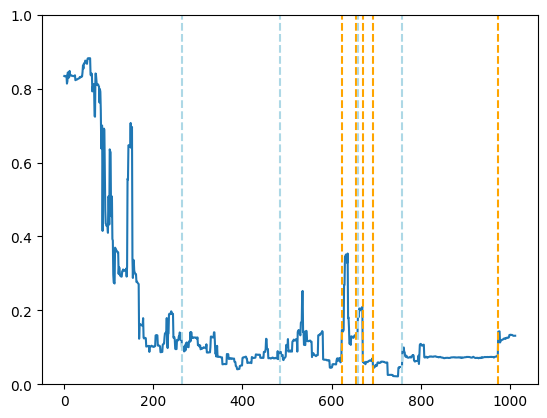

In [175]:
killTimes = df.iloc[4745:5758][['team1_alive_num','team2_alive_num']].drop_duplicates()
killTimes['team1_was_alive_num'] = killTimes['team1_alive_num'].shift(1)
killTimes['team2_was_alive_num'] = killTimes['team2_alive_num'].shift(1)
killTimes['isTeam1Killed'] = killTimes.apply(lambda x: "orange" if x['team1_was_alive_num'] > x['team1_alive_num'] else "lightblue", axis=1)
killTimes = killTimes[['team1_alive_num','team2_alive_num','isTeam1Killed']]
killTimes['idx'] = killTimes.index - 4745

plt.plot(y_pred_copy[4745:5758])
for i in range(1,len(killTimes)):
    plt.axvline(killTimes.iloc[i]['idx'], color = killTimes.iloc[i]['isTeam1Killed'], linestyle = '--')
plt.ylim(0, 1)
#plt.xlim(600,700)